# Downloading and viewing deep dive

So far, we have gone through loading protein structures (PDBs) locally. 
This script walks you through the process of accessing a PDB from the internet without having to create a file.


## Downloading and analyzing

In [1]:
import backmap
import requests # For accessing the PDB website
import io       # For treating a block text of text as a filehandle

# Identifying a PDB to view by its PDB ID
PDBID = "3E07"
PDBID = "8SHM"
PDBID = "1SP7" 
PDBID = "2FFT"
# This is the structure of a URL that downloads a non-zipped PDB from RCSB.ORG
URL = f'https://files.rcsb.org/download/{PDBID}.pdb'
# "Downloading" (really, requesting)
response = requests.get(URL)#, stream=True)
# Accessing the PDB text
pdb_block = response.text

# Here, we could create a temporary file, save the text to the file
# and then provide the temporary filename to backmap, as done in the walkthrough
#with open('deme.pdb','wt') as f:
#   f.write(pdb_block)

# Instead of unnecessarily saving the file to your file system, you can use 
# StringIO to convert the file into a filehandle
fh = io.StringIO(pdb_block)
# You can skip the next line, but then the PDB ID information will be missing 
# in the graphs
fh.name = URL 

# Analyzing the PDB and creating a new row "R"
structure_df = backmap.process_PDB(fh)
# Displaying the dataframe
structure_df.head()

,atomno,resname,chain,resid,occupancy,tf,segname,model,phi,psi,R
0,1,SER,A,1,1.0,2.00,None,1,NaN,29.085181,NaN
1,12,ALA,A,2,1.0,14.23,None,1,-161.710494,157.217687,0.493760
2,22,ALA,A,3,1.0,32.33,None,1,-163.929703,124.036378,0.444593
3,32,LYS,A,4,1.0,11.44,None,1,56.513637,-176.083053,0.333931
4,54,GLY,A,5,1.0,1.34,None,1,155.540044,-157.825870,0.496825


## VIEWING SPECIFIC GRAPHS

So far, we have been using the `backmap.draw_figures()` function to view a set of figures (heatmaps showing per-residue R values, RMSD, RMSF, and per modle R histograms). In most situations, only some images may be, needed. In that situation, one could one of the four functions:


### Per-model, per-residue R heatmaps

The following figure is colored by the `SecondaryStructure` cmap. But You can use `Chirality`, `Greys`, or any other legitimate cmap name available to `matplotlib`.

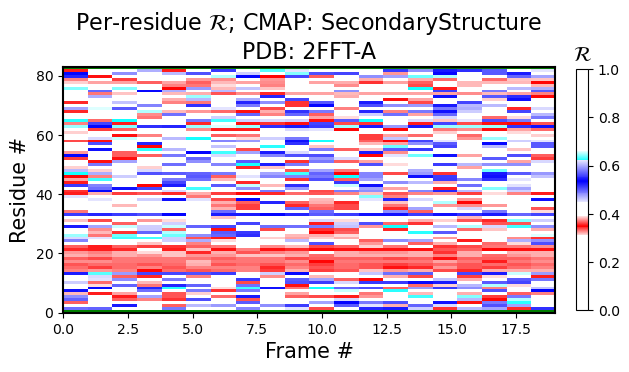

In [2]:
current_figures = backmap.draw_per_residue_plot(structure_df, 
                                                output_dir='', 
                                                write=False, 
                                                show=True, 
                                                v_limit = (0,1), 
                                                cmap='SecondaryStructure')

# FOR REFERENCE: this is how we used to call all plots at once:
# should_be_true, figure_dict    = backmap.draw_figures(structure_df=structure_df, output_dir='', 
#                                                       write=False, show=True)

### Per-model, per-residue RMSD(R) heatmaps

Here, for each model index $t$, the per-residue $RMSD(R)$ represents the root mean squared deviation of that model and residue's R vs the first model and corresponding residue's R (i.e., for any residue in model $t$, the heatmap value would be represented by $|R_t-R_1|$, where $1$ represents the first model).

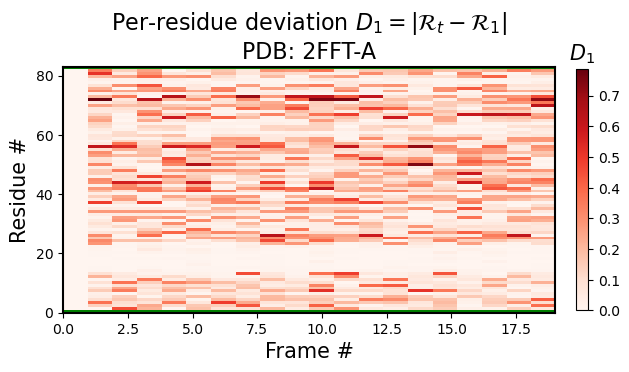

In [3]:
current_figures = backmap.draw_per_residue_RMSD(structure_df, 
                                                output_dir='', 
                                                write=False, 
                                                show=True, 
                                                v_limit = (0,1),
                                                cmap='Reds')

Identical to the function above, you can use the `backmap.draw_per_residue_RMSF()` function to get root mean squared fluctions; i.e., in stead of comparing corresponding residues between the current model $t$ and the first model $1$, one would compare to the previous model for any residue in model $t$, the heatmap value would be represented by $|R_t-R_{t-1}|$, where $t-1$ represents the previous model.


### Per-model histograms of R
As the sub-title says, it allows you to see the histogram distribution of $R$ for each model (so, $R$ is now on the y-axis, and the color represents occupancy of the model's residues in that regions of $R$)

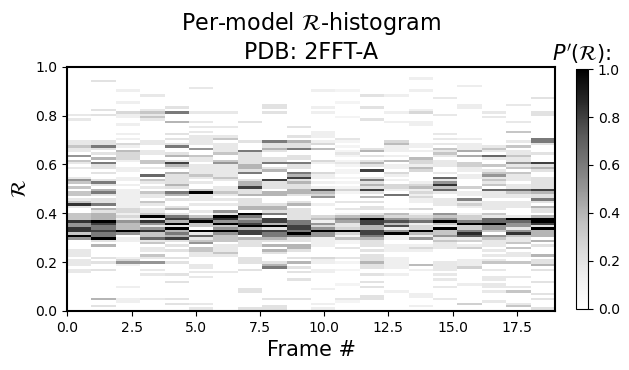

In [4]:
current_figures = backmap.draw_per_model_histogram(structure_df, 
                                                   output_dir='', 
                                                   write=False, 
                                                   show=True, 
                                                   bin_steps=0.2, 
                                                   v_limit = (0,1), 
                                                   cmap='Greys')

## Displaying Custom Colormaps
Here are the custom color maps that are useful for displaying your own R-derived images. Their names should be identical to the names used for colormaps above

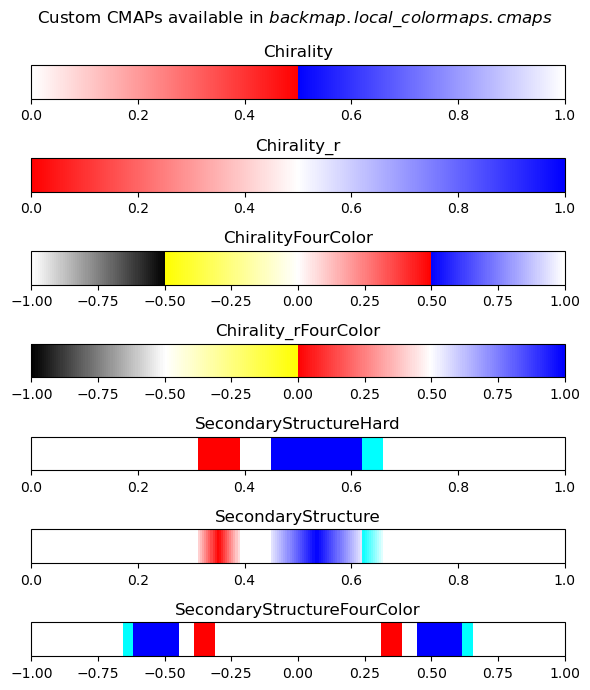

In [5]:
# Showing the types of colormaps available to backmap.local_colormaps

import backmap

fig,axes = backmap.local_colormaps.display_cmaps()

## For completeness, using backmap.draw_figures()
This usage is identical to the one used in the first walkthrough notebook.

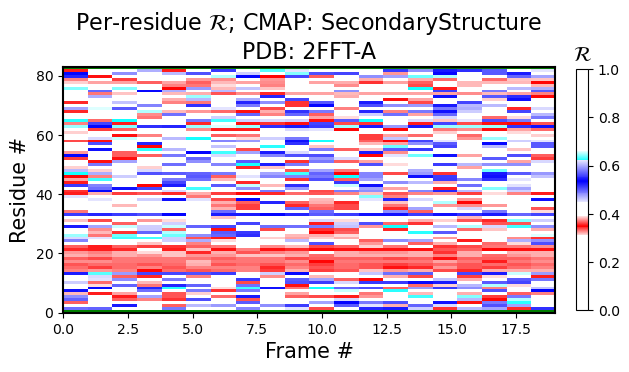

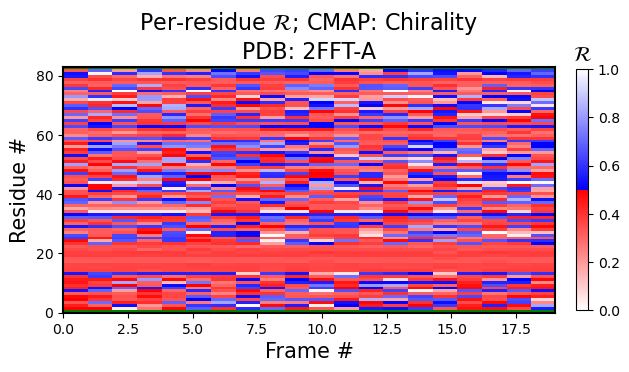

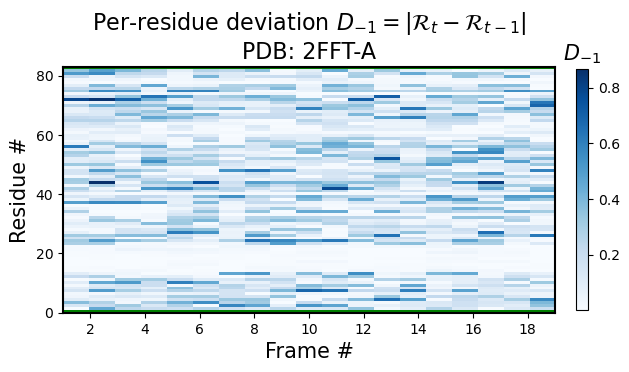

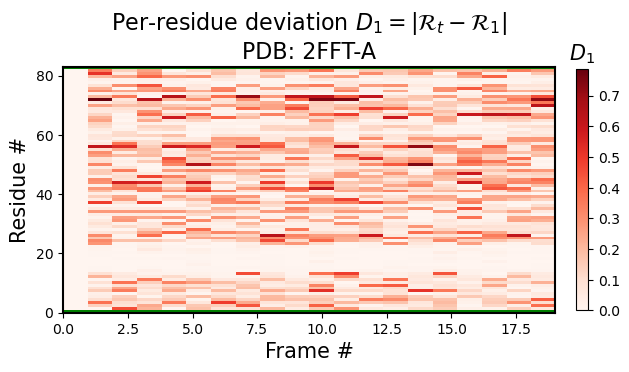

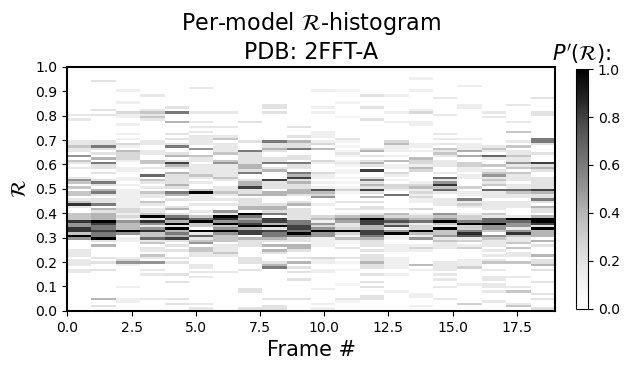

<Figure size 640x480 with 0 Axes>

In [6]:
should_be_true, figure_dict = backmap.draw_figures(structure_df=structure_df, 
                                                   output_dir='', 
                                                   write=False, 
                                                   show=True)